## Core of the global network / Latent space models

In [1]:
setwd("/datastore0/shared/diliara/Latent Space Models/data")
library(latentnet)
library(statnet)

Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

Loading required package: ergm

ergm: version 3.8.0, created on 2017-08-18
Copyright (c) 2017, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. 

               Installed ReposVer Built  
ergm           "3.8.0"   "3.9.4"  "3.4.2"
ergm.count     "3.2.2"   "3.3.0"  "3.4.2"
latentnet      "2.8.0"   "2.9.0"  "3.4.2"
statnet.common "4.0.0"   "4.1.4"  "3.4.2"
tergm          "3.4.1"   "3.5.2"  "3.4.2"


Restart R and use "statnet::update_statnet()" to get the updates.


In [2]:
# Nodes are countries, ties are the number of individual transitions
# People are corporate executives in large corporations
# These individuals move from one country to another during their careers (2000-2015): one career move = one transition

# From sequence analysis results, I have transition matricies (using Traminer)
# These transition matricies are the number of individual transitions from country to country (not probabilities of transitions)

# I have several snapshots:
# 1 - Transitions that happened during 2000-2003
# 2 - ......................... during 2004-2006
# 3 - ......................... during 2007-2011
# 4 - ......................... during 2012-2015

## Read matrices and visualize

### 2000-2003

In [3]:
df03 <- read.csv('trans2003R.csv', header = TRUE, row.names=1, sep = ",")
df03 <- as.matrix(df03)
df03 <- df03/rowSums(df03) 
# replace NaN with 0
df03[is.nan(df03)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df03net <- as.network(df03, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")

In [4]:
summary(df03net)

Network attributes:
  vertices = 77
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 117 
   missing edges = 0 
   non-missing edges = 117 
 density = 0.01999316 

Vertex attributes:
  vertex.names:
   character valued attribute
   77 valid vertex names

Edge attributes:

 weight:
   numeric valued attribute
   attribute summary:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007143 0.035714 0.100000 0.230769 0.285714 1.000000 

Network edgelist matrix:
       [,1] [,2]
  [1,]    8   10
  [2,]    4   11
  [3,]    8   11
  [4,]    4   16
  [5,]   11   17
  [6,]    4   21
  [7,]   11   21
  [8,]    4   22
  [9,]   11   22
 [10,]   17   22
 [11,]   20   22
 [12,]   11   23
 [13,]   17   23
 [14,]   19   23
 [15,]   21   23
 [16,]    4   24
 [17,]    6   24
 [18,]   10   24
 [19,]   11   24
 [20,]   14   24
 [21,]   16   24
 [22,]   17   24
 [23,]   21   24
 [24,]   22   24
 [25,]   23   24
 [26,]    8   26
 [27,]    4   29
 

In [5]:
wnet03=as.sociomatrix(df03net,"weight") 
wnet03

,AE,AR,AT,AU,BD,BE,BG,BM,BR,CA,⋯,SG,SI,TH,TR,TW,UA,US,VG,ZA,ZM
AE,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
AR,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
AT,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
AU,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.01408451,0,0,0,0,0,0.02816901,0,0.02816901,0
BD,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
BE,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
BG,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
BM,0,0,0,0,0,0,0,0,0,0.1666667,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
BR,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0
CA,0,0,0,0,0,0,0,0,0,0.0000000,⋯,0.00000000,0,0,0,0,0,0.00000000,0,0.00000000,0


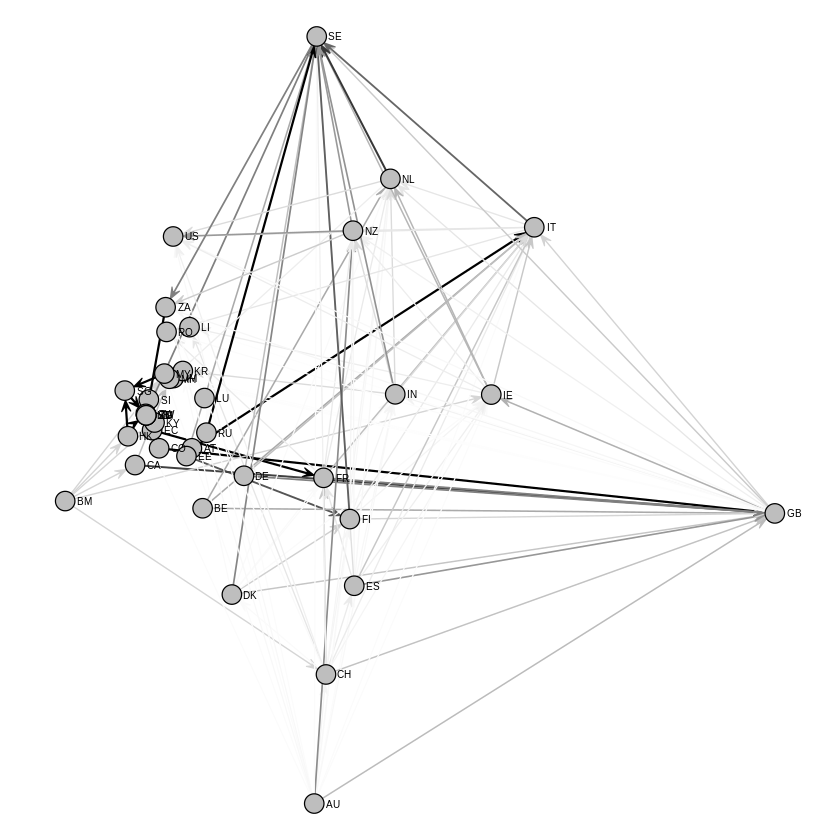

In [7]:
par(mar=rep(0,4))
weight.col <- gray(1 - (df03net %e% "weight")/1)
gplot(df03net, displaylabels=TRUE, displayisolates=FALSE, label.pos=4,label.cex=0.5,
     vertex.cex=1,vertex.col='gray',edge.lwd=df03net%e%'weight', usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6, edge.col=weight.col)


### 2004-2006

In [8]:
df06 <- read.csv('trans2006.csv', header = TRUE, row.names=1, sep = ",")
df06 <- as.matrix(df06)
# set daigonals to zero
diag(df06) <- 0
df06 <- df06/rowSums(df06) 
# replace NaN with 0
df06[is.nan(df06)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df06net <- as.network(df06, directed=TRUE, matrix.type="a",
                      ignore.eval=FALSE, names.eval="weight")
wnet06=as.sociomatrix(df06net,"weight") 

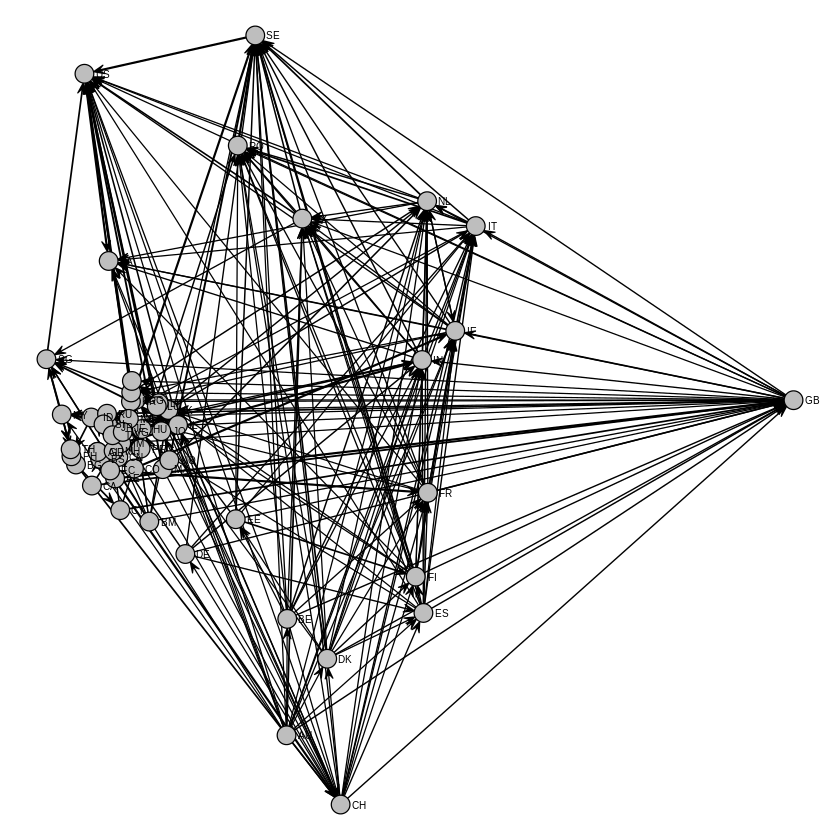

In [9]:
par(mar=rep(0,4))
weight.col <- gray(1 - (df06net %e% "weight")/5)
gplot(df06net, displaylabels=TRUE, displayisolates=FALSE, label.pos=4,label.cex=0.5,
     vertex.cex=1,vertex.col='gray',edge.lwd=df06net%e%'weight', usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6)


### 2007-2011

In [13]:
df11 <- read.csv('trans2011.csv', header = TRUE, row.names=1, sep = ",")
df11 <- as.matrix(df11)
# set diagonals to zero
diag(df11) <- 0
df11 <- df11/rowSums(df11) 
# replace NaN with 0
df11[is.nan(df11)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df11net <- as.network(df11, directed=TRUE, matrix.type="a",
                      ignore.eval=FALSE, names.eval="weight")

wnet11=as.sociomatrix(df11net,"weight") 

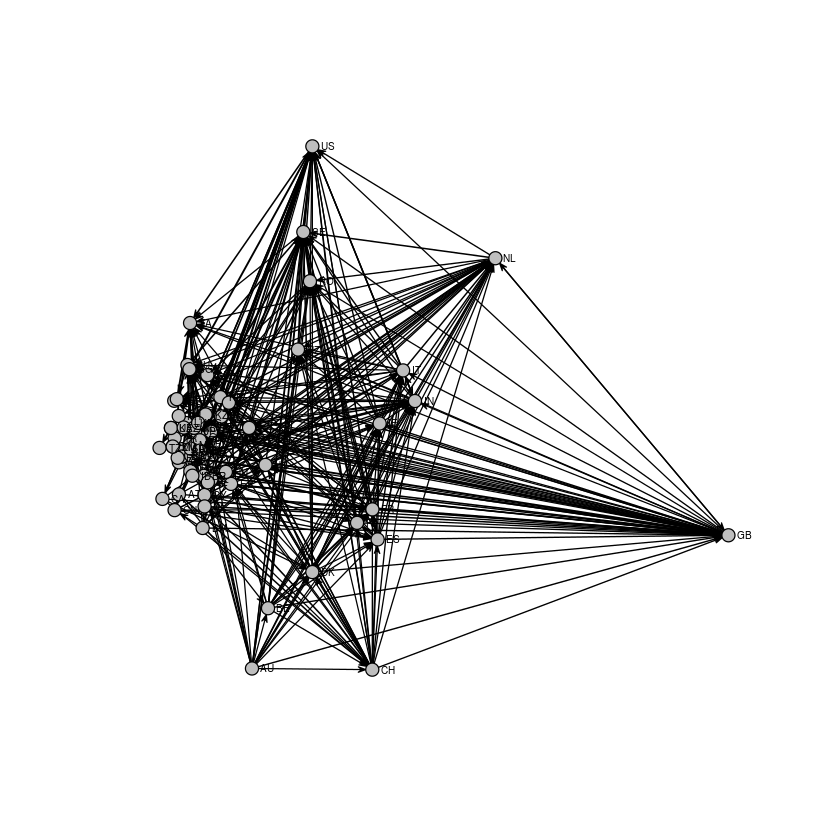

In [23]:
weight.col <- gray(1 - (df11net %e% "weight")/1)
gplot(df11net, displaylabels=TRUE, displayisolates=FALSE, label.pos=4,label.cex=0.5,
     vertex.cex=1,vertex.col='gray',edge.lwd=df11net%e%'weight', usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6)


### 2012-2015

In [16]:
df15 <- read.csv('trans2015.csv', header = TRUE, row.names=1, sep = ",")
df15 <- as.matrix(df15)
# set diagonals to zero
diag(df15) <- 0
df15 <- df15/rowSums(df15) 
# replace NaN with 0
df15[is.nan(df15)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df15net <- as.network(df15, directed=TRUE, matrix.type="a",
                      ignore.eval=FALSE, names.eval="weight")
wnet15=as.sociomatrix(df15net,"weight") 

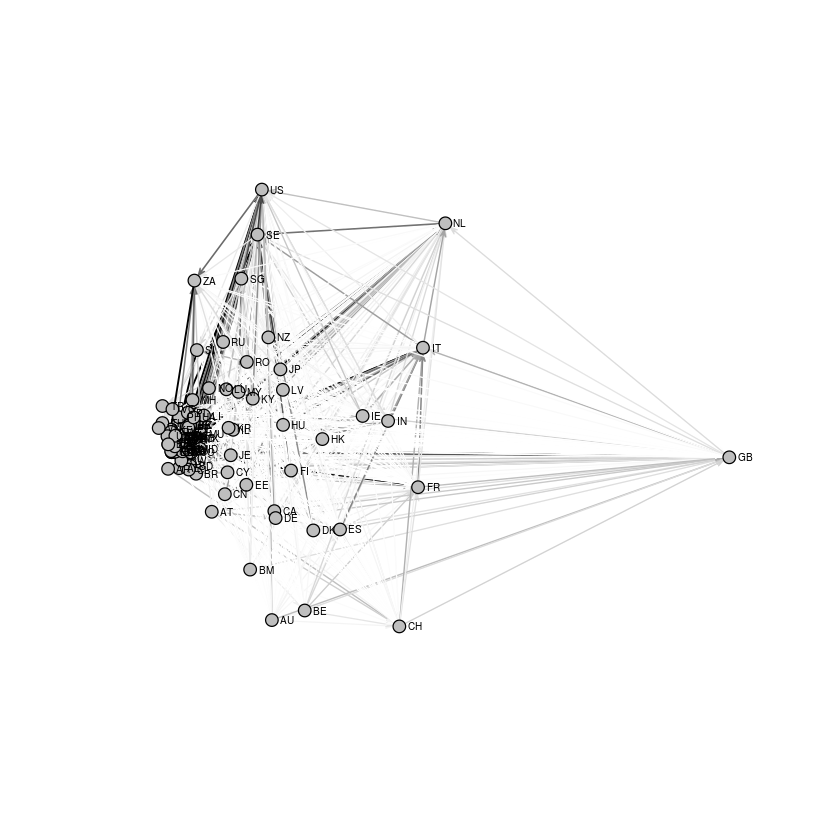

In [24]:
weight.col <- gray(1 - (df15net %e% "weight")/1)
gplot(df15net, displaylabels=TRUE, displayisolates=FALSE, label.pos=4,label.cex=0.5,
     vertex.cex=1,vertex.col='gray',edge.lwd=df15net%e%'weight', usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6, edge.col=weight.col)


## Models

In [ ]:
# latent space effects: dimensions and clusters
# actor-specific random effects: sender, reciever, sociality
# ergm-terms

In [25]:
ls()

[1] "df03"       "df03net"    "df06"       "df06net"    "df11"      
 [6] "df11net"    "df15"       "df15net"    "weight.col" "wnet03"    
[11] "wnet06"     "wnet11"     "wnet15"

#### 2000-2003

In [42]:
### models with no clusters
m1 <- ergmm(df03net ~ euclidean(d=2), verbose=TRUE, tofit="mle", seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Post-processing the MCMC output:
Double-checking conditional posterior mode estimate... Finished.
Using the conditional posterior mode to seed an MLE fit...  Finished.


In [39]:
summary(m1)


Summary of model fit

Formula:   df03net ~ euclidean(d = 2)
Attribute: edges
Model:     Bernoulli 
Covariate coefficients MLE:
             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -1.922818   0.095556 -20.122 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


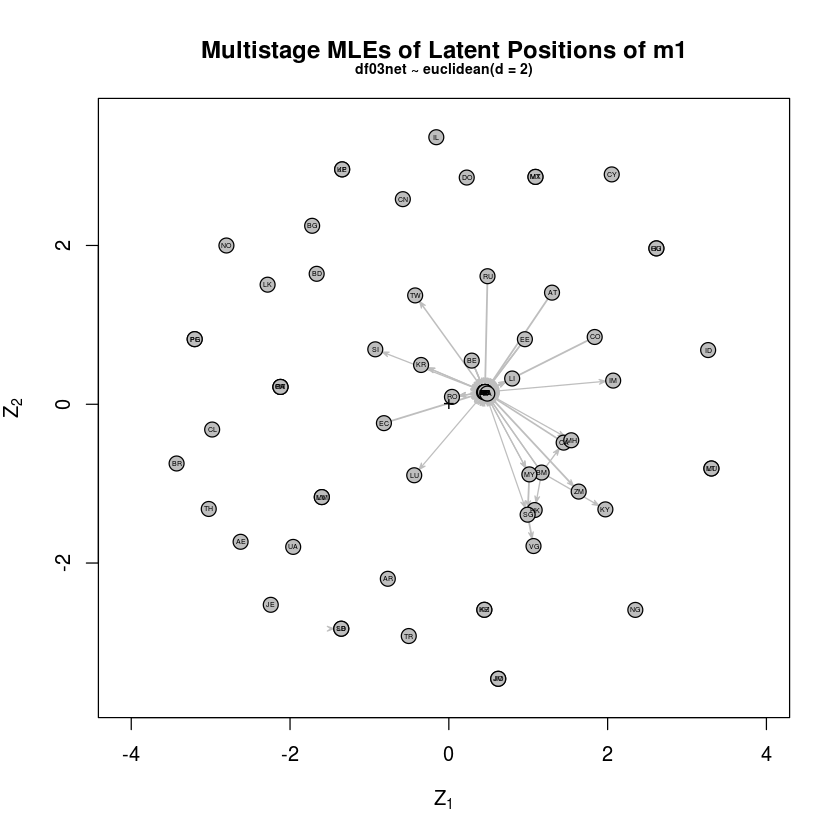

In [74]:
plot(m1, what="mle", pie=TRUE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,vertex.col='grey',
    edge.lwd=df03net%e%'weight', arrowhead.cex = 0.6, label.pos=5,label.cex=0.35,
    curve1D=TRUE)

# The what argument lets you select what aspect of the fit you want to plot.
# The default (if MCMC has been run), is "mkl", the Minimum Kullback-Liebler divergence,
# which tends to be better for visual inspection, but posterior mean ("pmean") is another option

In [44]:
mcmc.diagnostics(m1)

ERROR: Error in mcmc.diagnostics.ergmm(m1): MCMC was not run for this ERGMM fit.


#### 2000-2003, no isolates

In [78]:
isol <- isolates(df03net)
network.vertex.names(df03net)[isol]

[1] "AE" "AR" "BD" "BG" "BR" "CL" "CN" "CY" "DO" "GG" "HU" "ID" "IL" "JE" "JM"
[16] "JO" "JP" "KE" "KH" "KZ" "LK" "LT" "LV" "MM" "MT" "MU" "MX" "NG" "NO" "PE"
[31] "PG" "PH" "PT" "QA" "TH" "TR" "UA"

In [15]:
## 2000-2003
df03i <- read.csv('trans2003R_noisolates2.csv', header = TRUE, row.names=1, sep = ",")
df03i <- as.matrix(df03i)
df03i <- df03i/rowSums(df03i) 
# replace NaN with 0
df03i[is.nan(df03i)] <- 0
df03inet <- as.network(df03i, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")
wnet03i=as.sociomatrix(df03inet,"weight") 

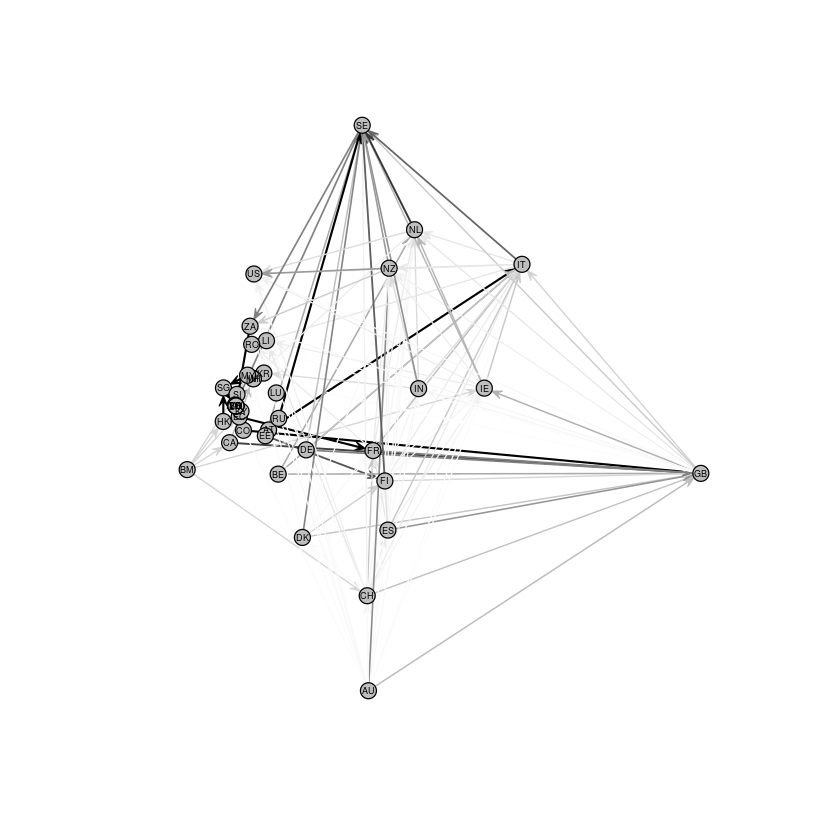

In [16]:
weight.col <- gray(1 - (df03inet %e% "weight")/1)
gplot(df03inet, displaylabels=TRUE, displayisolates=FALSE, label.pos=5,label.cex=0.45,
     vertex.cex=0.9,vertex.col='gray',edge.lwd=df03inet%e%'weight', usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6, edge.col=weight.col)


In [17]:
### no clusters

m1 <- ergmm(df03inet ~ euclidean(d=2), verbose=TRUE, tofit="mle", seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m1)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Post-processing the MCMC output:
Double-checking conditional posterior mode estimate... Finished.
Using the conditional posterior mode to seed an MLE fit...  Finished.



Summary of model fit

Formula:   df03inet ~ euclidean(d = 2)
Attribute: edges
Model:     Bernoulli 
Covariate coefficients MLE:
            Estimate Std. Error z value  Pr(>|z|)    
(Intercept)  1.05124    0.11144  9.4332 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


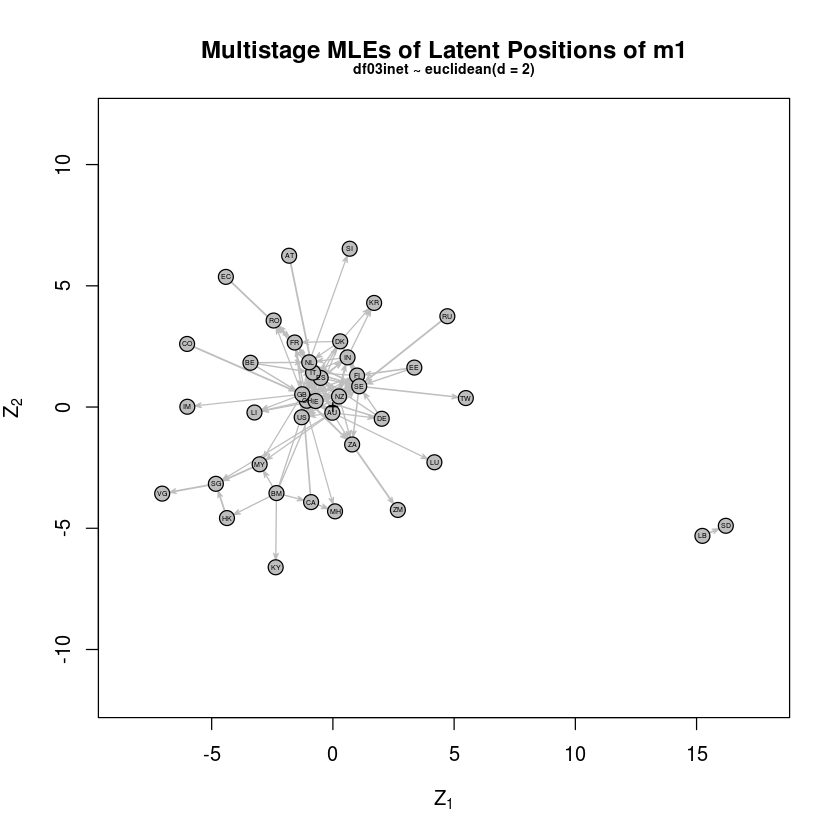

In [18]:
plot(m1, what="mle", pie=TRUE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,vertex.col='grey',
    edge.lwd=df03inet%e%'weight', arrowhead.cex = 0.6, label.pos=5,label.cex=0.35,
    curve1D=TRUE)

In [20]:
### 3 clusters
m2 <- ergmm(df03inet ~ euclidean(d=2,G=3), verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m2)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


NOTE: It is not certain whether it is appropriate to use latentnet's BIC to select latent space dimension, whether or not to include actor-specific random effects, and to compare clustered models with the unclustered model.



Summary of model fit

Formula:   df03inet ~ euclidean(d = 2, G = 3)
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
             Estimate      2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.088024 -0.501792 0.3381               0.6666

Overall BIC:        617.032 
Likelihood BIC:     630.7339 
Latent space/clustering BIC:     -13.70192 

Covariate coefficients MKL:
            Estimate
(Intercept) -1.15709



Chain 1 
Lag 0 
               lpY      beta.1      Z.1.1       Z.1.2
lpY     1.00000000  0.34510894 0.01732216 -0.05995818
beta.1  0.34510894  1.00000000 0.03456199 -0.04359296
Z.1.1   0.01732216  0.03456199 1.00000000  0.03148159
Z.1.2  -0.05995818 -0.04359296 0.03148159  1.00000000

Lag 10 
               lpY      beta.1      Z.1.1       Z.1.2
lpY     0.35315695  0.24498890 0.02326990 -0.02943413
beta.1  0.23396227  0.44413115 0.01241754 -0.02883887
Z.1.1   0.01034507  0.01503297 0.39172970  0.05446148
Z.1.2  -0.03118739 -0.02884413 0.05286951  0.53843401



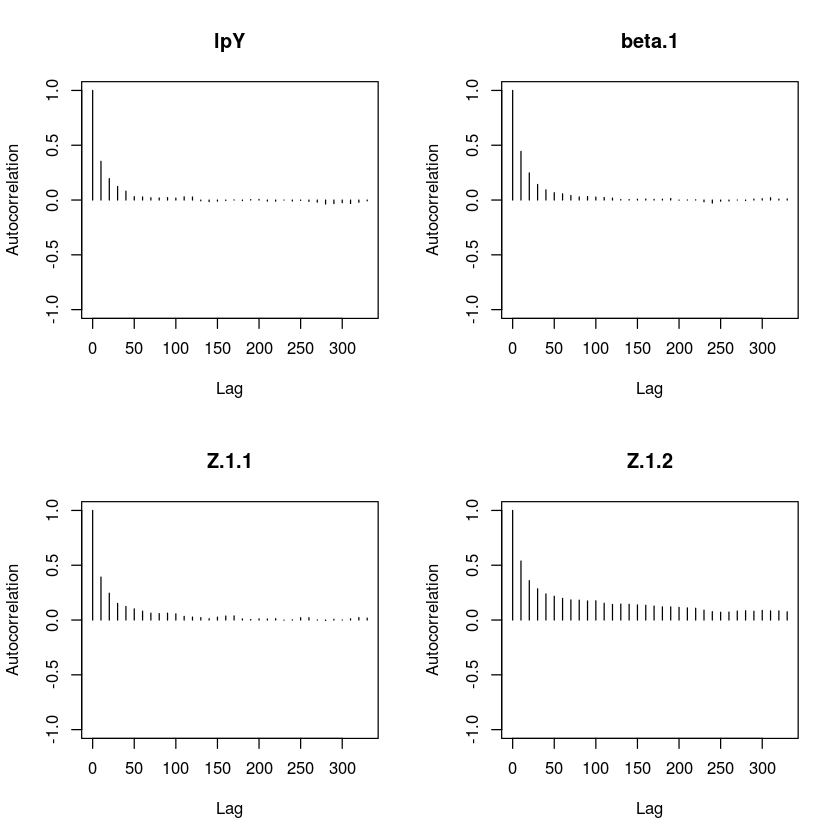

[[1]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.0125
Probability (s) = 0.95 
                                              
        Burn-in  Total Lower bound  Dependence
        (M)      (N)   (Nmin)       factor (I)
 lpY    30       6910  600          11.5      
 beta.1 40       8250  600          13.8      
 Z.1.1  80       15220 600          25.4      
 Z.1.2  90       19230 600          32.0      




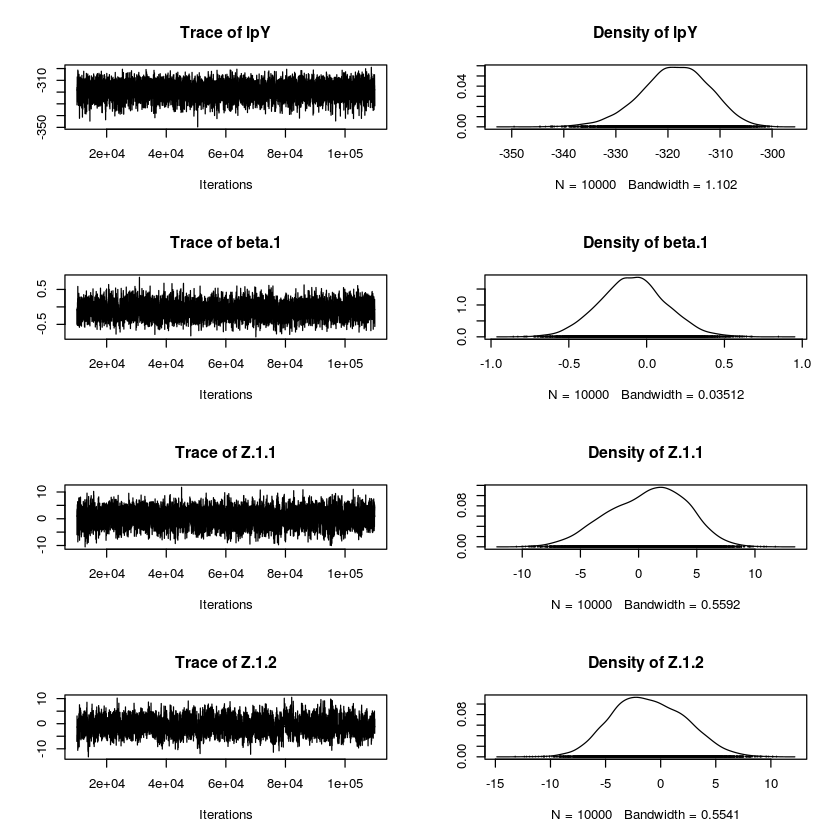

In [23]:
mcmc.diagnostics(m2)

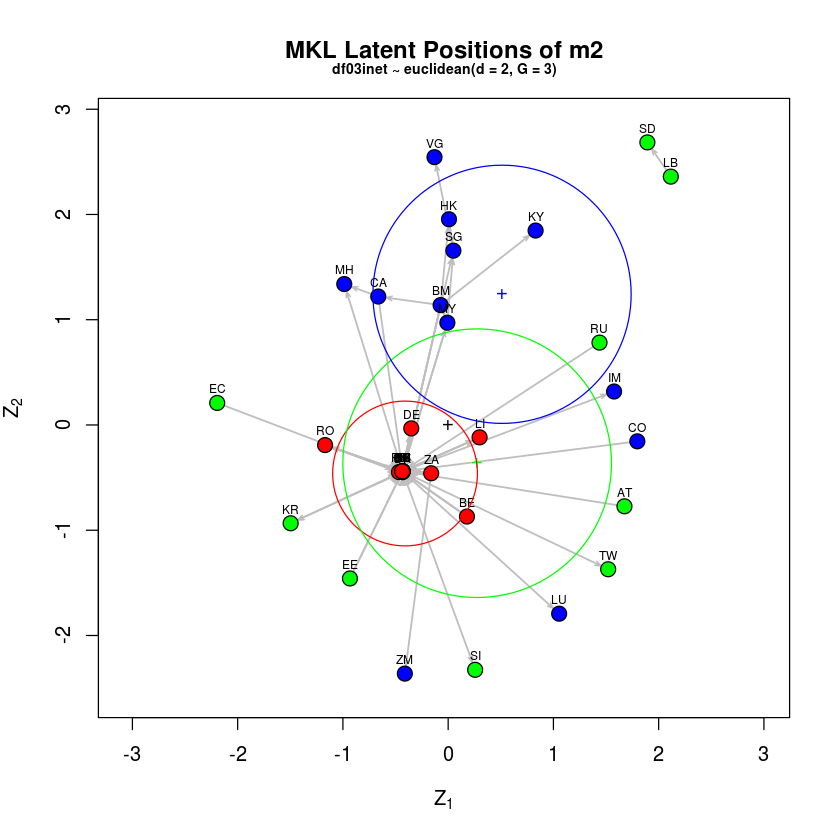

In [32]:
plot(m2, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

#labels=TRUE, print.formula=TRUE, vertex.cex=1.3,vertex.col='grey',
#    edge.lwd=df03inet%e%'weight', arrowhead.cex = 0.6, label.pos=5,label.cex=0.35,
#    curve1D=TRUE)

In [33]:
### 2 clusters
m3 <- ergmm(df03inet ~ euclidean(d=2,G=2), verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m3)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.



Summary of model fit

Formula:   df03inet ~ euclidean(d = 2, G = 2)
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
             Estimate      2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.058719 -0.485189 0.3997               0.7758

Overall BIC:        579.8852 
Likelihood BIC:     634.9786 
Latent space/clustering BIC:     -55.09338 

Covariate coefficients MKL:
             Estimate
(Intercept) -1.179972



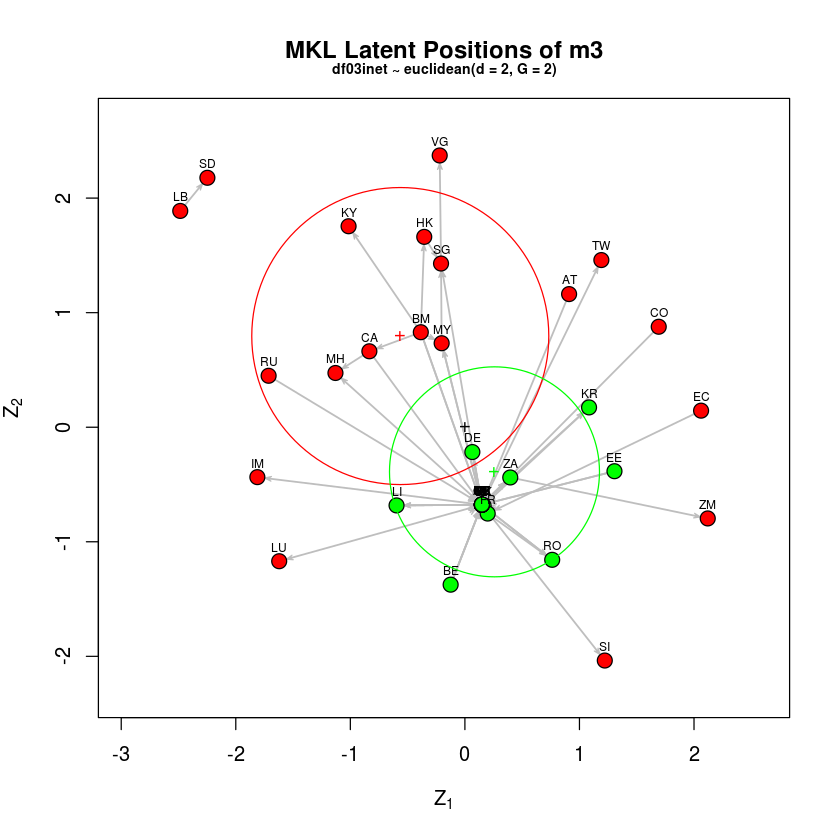

In [35]:
plot(m3, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)


In [36]:
### 4 clusters
m4 <- ergmm(df03inet ~ euclidean(d=2,G=4), verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m4)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.



Summary of model fit

Formula:   df03inet ~ euclidean(d = 2, G = 4)
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
            Estimate     2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.12113 -0.52259 0.3014               0.5594

Overall BIC:        893.5125 
Likelihood BIC:     625.9126 
Latent space/clustering BIC:     267.5999 

Covariate coefficients MKL:
             Estimate
(Intercept) -1.123062



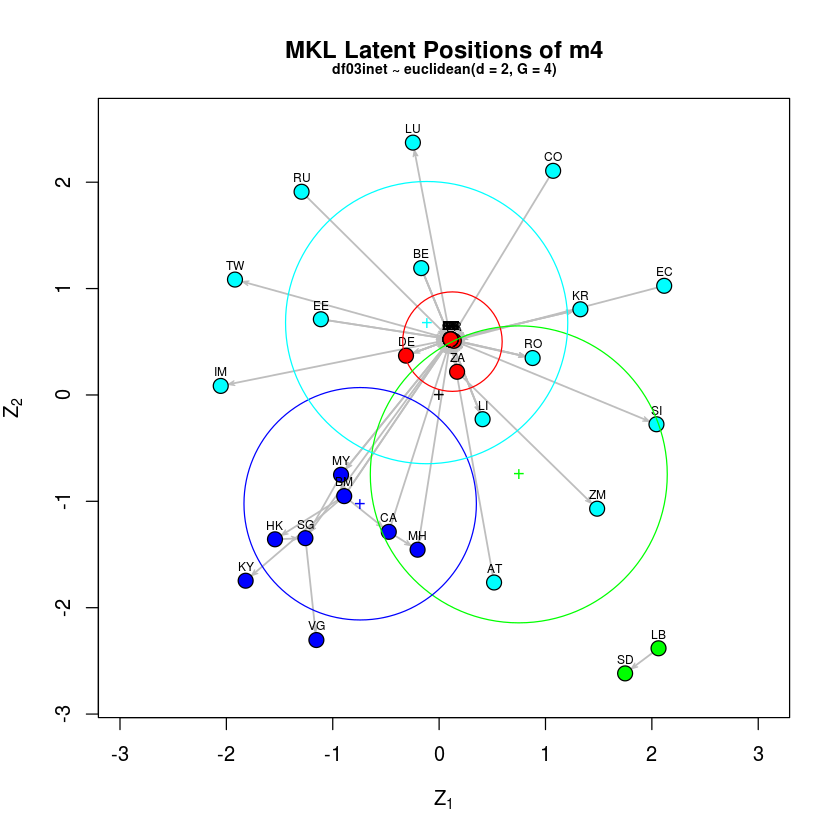

In [37]:
plot(m4, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

### Optimal number of clusters

In [41]:
## Compare BICs

fits<-lapply(2:4, function(G){
ergmm(df03inet ~ euclidean(d=2,G=G))
})
# Latentnet returns a breakdown of BICs by model component:
do.call(rbind,lapply(lapply(fits,bic.ergmm),as.data.frame))

Y,Z,sender,receiver,sociality,overall
633.5284,250.5737,0,0,0,884.1021
622.4521,275.1699,0,0,0,897.6220
630.2012,255.4915,0,0,0,885.6928


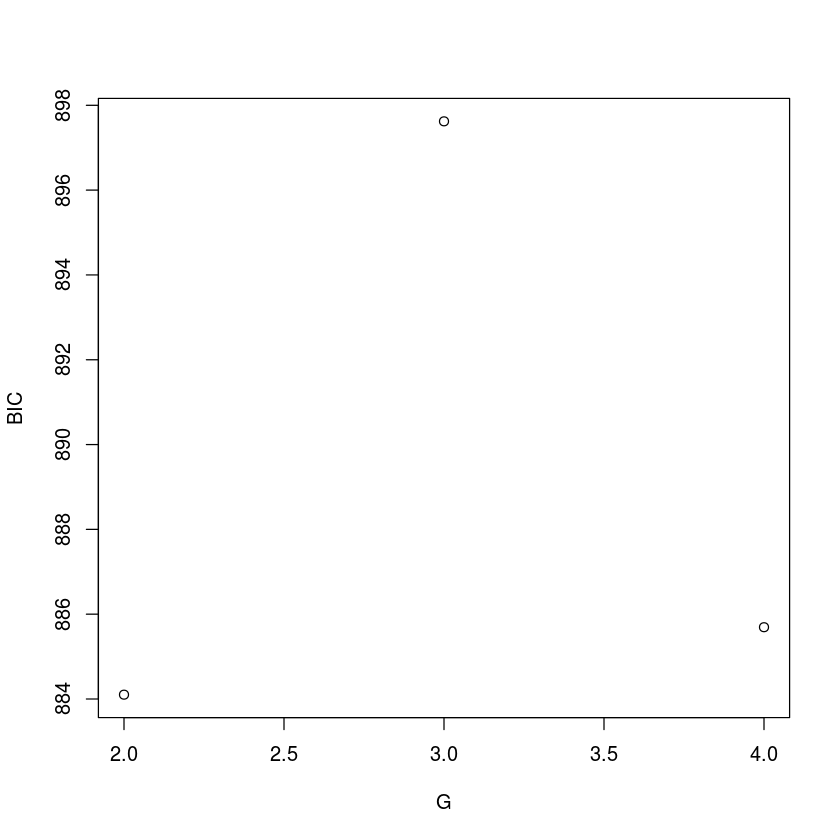

In [42]:
# Let's grab just the overall BICs and plot them:
plot(2:4,sapply(lapply(fits,bic.ergmm),"[[","overall"),xlab="G",ylab="BIC",main="")

# 2 or 4 clusters  is good

### Adding receiver effects

In [43]:
m5 <- ergmm(df03inet ~ euclidean(d=2,G=4) + rreceiver, verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Backing off: too few acceptances. If you see this message several times in a row, use a longer burnin.
Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


In [44]:
summary(m5)


Summary of model fit

Formula:   df03inet ~ euclidean(d = 2, G = 4) + rreceiver
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
            Estimate     2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.42128 -1.05085 0.1992               0.1864

Receiver effect variance: 1.231441.
Overall BIC:        879.205 
Likelihood BIC:     562.4538 
Latent space/clustering BIC:     220.6076 
Receiver effect BIC:     96.1436 

Covariate coefficients MKL:
             Estimate
(Intercept) -1.649648



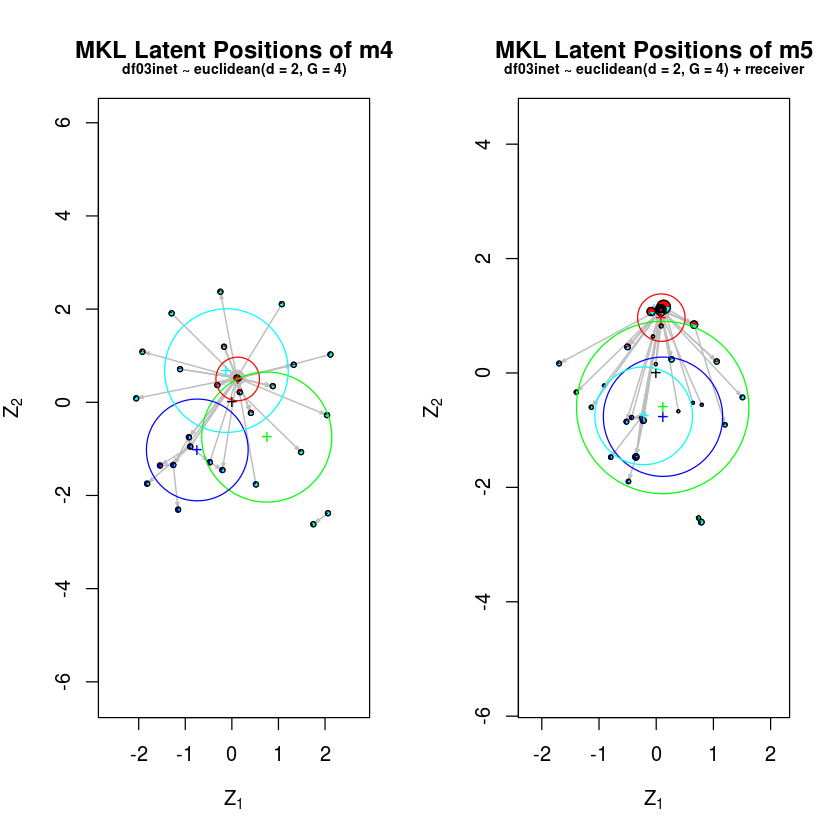

In [46]:
# Let’s plot the fit without receiver effects and with sender effect side by side
par(mfrow=c(1,2))
# Extract a clustering. In particular, ask summary() to give you the posterior mean.
Z.K.ref <- summary(m4,point.est="pmean")$pmean$Z.K
# Plot one model, saving positions, using Z.K.ref to set reference clustering.
Z.ref <- plot(m4, pie=TRUE, Z.K.ref=Z.K.ref)
# Plot the other model, using Z.ref and Z.K.ref to ensure similar
# orientation and coloring.
plot(m5, rand.eff="receiver", pie=TRUE, Z.ref=Z.ref, Z.K.ref=Z.K.ref)

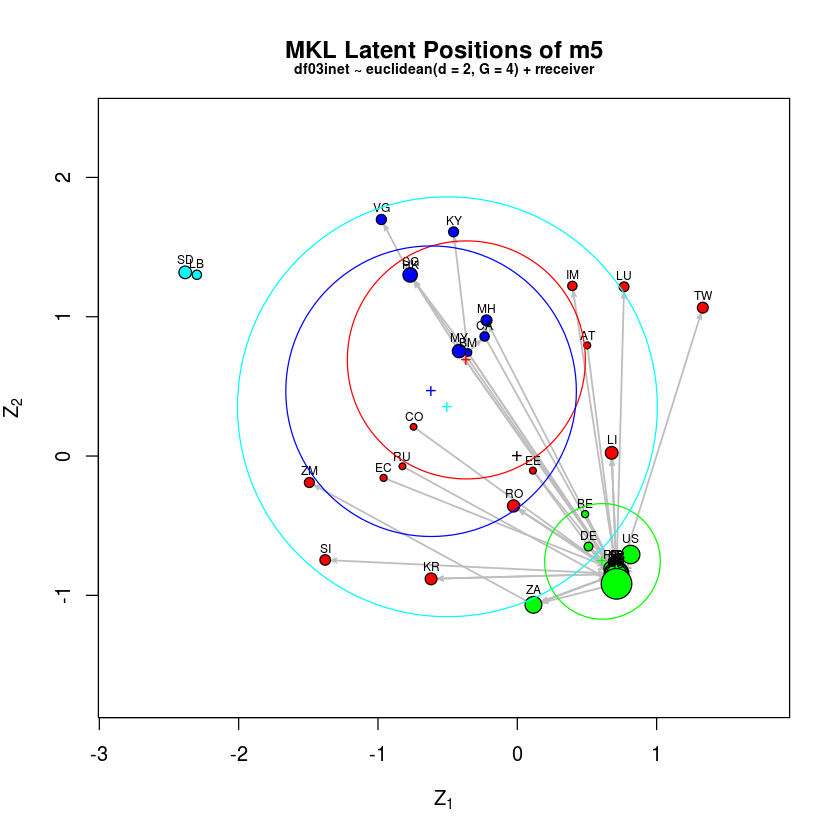

In [47]:
plot(m5, pie=FALSE, labels=TRUE, print.formula=TRUE,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6, rand.eff="receiver")

### Adding sender effects

In [48]:
m6 <- ergmm(df03inet ~ euclidean(d=2,G=3) + rsender, verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


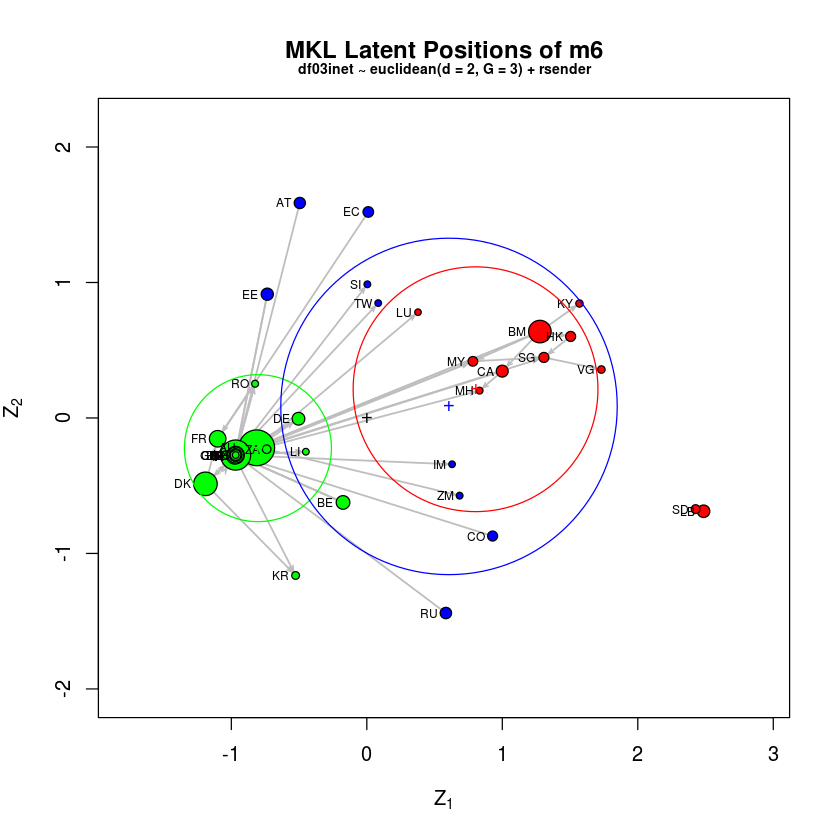

In [51]:
plot(m6, pie=FALSE, labels=TRUE, print.formula=TRUE,
     arrowhead.cex = 0.6, label.pos=2,label.cex=0.6, rand.eff="sender")

### Adding sociality effects

In [56]:
m7 <- ergmm(df03inet ~ euclidean(d=2,G=3) + rsociality, verbose=TRUE, seed = 6,
            control = control.ergmm(burnin = 10000, sample.size = 10000))

# gives error

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... 

ERROR: Error in if (inherits(EMloop, "try-error") || with(theta, max(Z.var)/min(Z.var)) > : missing value where TRUE/FALSE needed


In [ ]:
plot(m7, pie=FALSE, labels=TRUE, print.formula=TRUE,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6, rand.eff="sociality")

#### Simulating networks

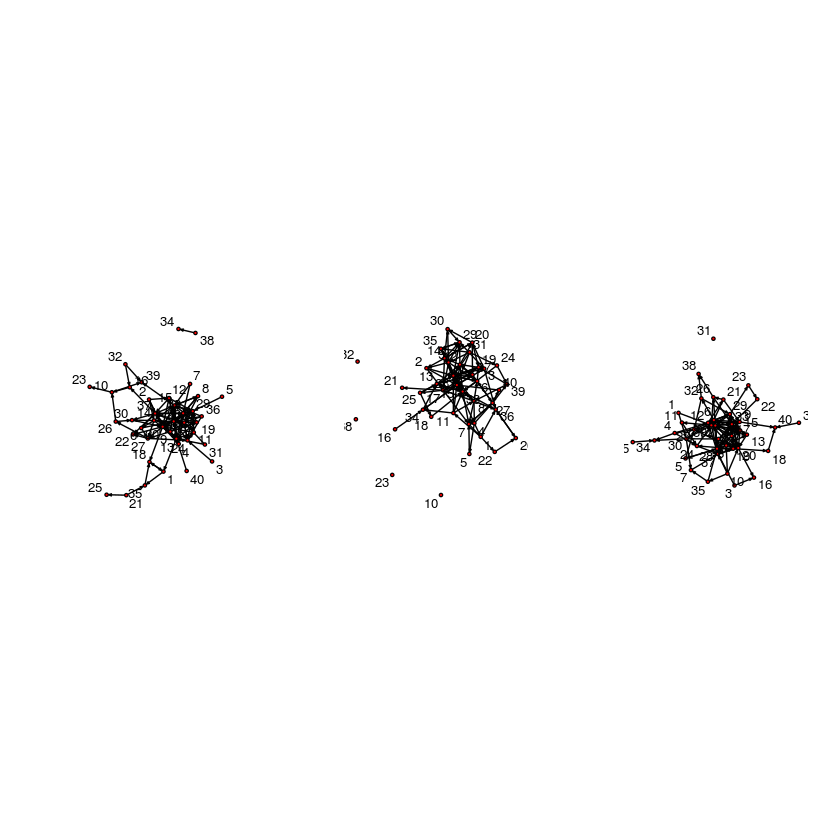

In [60]:
# Simulating networks from a model fit is also possible:
par(mfrow=c(1,3))
for(i in 1:3) plot(simulate(m5),displaylabels=TRUE)

## 2004-2006

In [105]:
# no isolates
isol <- isolates(df06net)
network.vertex.names(df06net)[isol]

[1] "AG" "AM" "AR" "AT" "BD" "BR" "BW" "CW" "CZ" "KZ" "LB" "LK" "LT" "MK" "MT"
[16] "NG" "OM" "PG" "PK" "PL" "PT" "SA" "SY" "TR" "TZ" "UA" "UG" "VN" "ZM" "ZW"

In [106]:
df06i <- read.csv('trans2006_noisolates.csv', header = TRUE, row.names=1, sep = ",")
df06i <- as.matrix(df06i)
df06i <- df06i/rowSums(df06i) 
# replace NaN with 0
df06i[is.nan(df06i)] <- 0
df06inet <- as.network(df06i, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")
wnet06i=as.sociomatrix(df06inet,"weight") 

In [107]:
wnet06i

,AE,AL,AU,BE,BG,BM,BS,CA,CH,CN,⋯,RO,RU,SE,SG,SI,TH,TW,US,VG,ZA
AE,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AL,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AU,0,0,0,2.655394e-06,0,0,0,0,1.327697e-05,0,⋯,0.000000e+00,0.000000e+00,7.966181e-06,2.655394e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.062157e-05,0.000000e+00,5.310787e-06
BE,0,0,0,0.000000e+00,0,0,0,0,1.157367e-05,0,⋯,1.157367e-05,0.000000e+00,2.314734e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.314734e-05,0.000000e+00,0.000000e+00
BG,0,0,0,0.000000e+00,0,0,0,0,8.456660e-05,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
BM,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,9.777943e-06,7.822354e-05,0.000000e+00,0.000000e+00,9.777943e-06,1.955589e-05,0.000000e+00,0.000000e+00
BS,0,0,0,0.000000e+00,0,0,0,0,1.805054e-03,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CA,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
CH,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,8.939680e-06,0.000000e+00,2.383915e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.979893e-06,1.489947e-06,2.979893e-06
CN,0,0,0,0.000000e+00,0,0,0,0,0.000000e+00,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


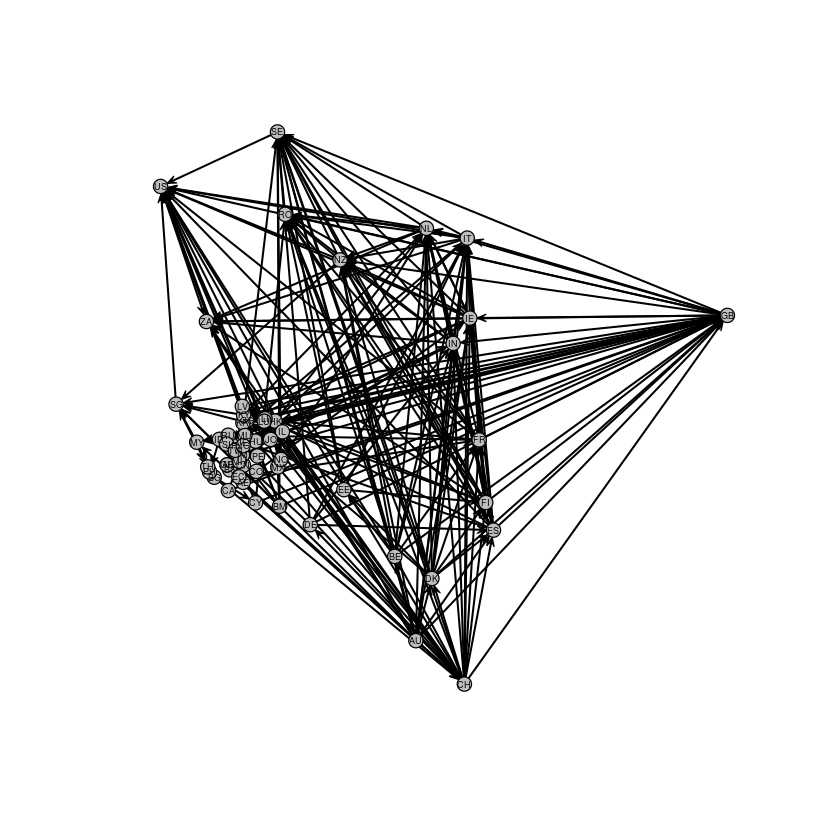

In [108]:
#weight.col <- gray(1 - (df06inet %e% "weight")/5)
#gplot(df06inet, displaylabels=TRUE, displayisolates=TRUE, label.pos=5,label.cex=0.45,
#     vertex.cex=0.9,vertex.col='gray', edge.lwd=df06inet%e%'weight', usecurve==TRUE,
#     mode="mds", arrowhead.cex = 0.6, edge.col=weight.col)


gplot(df06inet, displaylabels=TRUE, displayisolates=TRUE, label.pos=5,label.cex=0.45,
     vertex.cex=0.9,vertex.col='gray',usecurve==TRUE,
     mode="mds", arrowhead.cex = 0.6)

In [109]:
## Compare BIC
fits<-lapply(2:5, function(G){
ergmm(df06inet ~ euclidean(d=2,G=G))
})
# Latentnet returns a breakdown of BICs by model component:
do.call(rbind,lapply(lapply(fits,bic.ergmm),as.data.frame))



Y,Z,sender,receiver,sociality,overall
1139.872,381.8240,0,0,0,1521.696
1149.840,388.6305,0,0,0,1538.471
1140.510,389.3357,0,0,0,1529.845
1136.311,388.7501,0,0,0,1525.061


In [113]:
# 5 clusters
m6.1 <- ergmm(df06inet ~ euclidean(d=2,G=5), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m6.1)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.



Summary of model fit

Formula:   df06inet ~ euclidean(d = 2, G = 5)
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
             Estimate      2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.090173 -0.397849 0.2211               0.5588

Overall BIC:        1536.266 
Likelihood BIC:     1142.908 
Latent space/clustering BIC:     393.3581 

Covariate coefficients MKL:
             Estimate
(Intercept) -1.096944



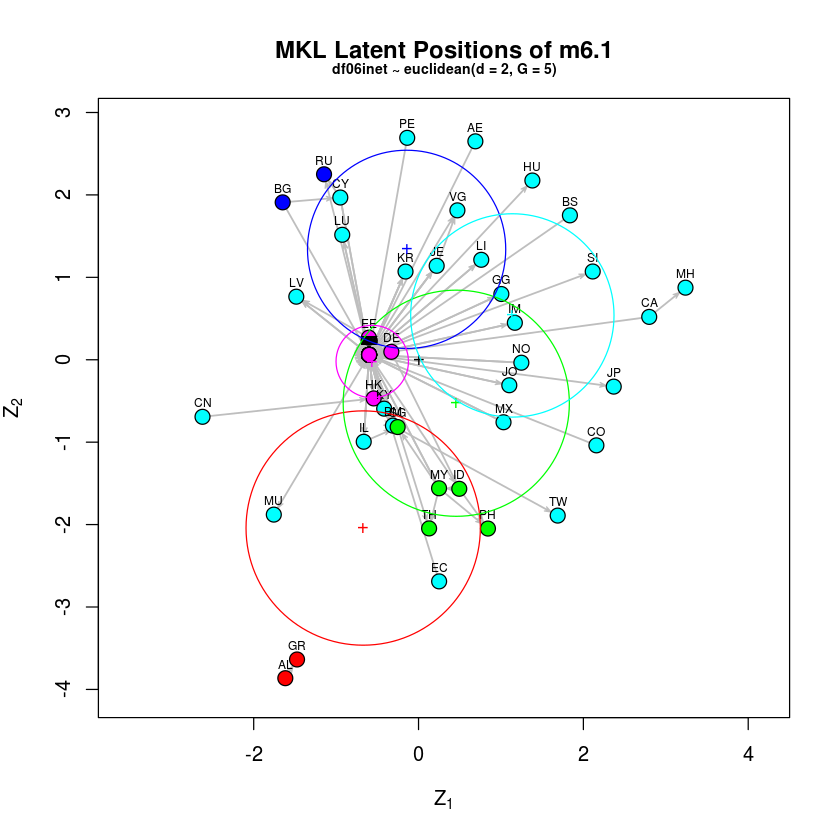

In [114]:
plot(m6.1, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

In [102]:
# 4 clusters
m6.2 <- ergmm(df06inet ~ euclidean(d=2,G=4), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))
summary(m6.2)

Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.



Summary of model fit

Formula:   df06inet ~ euclidean(d = 2, G = 4)
Attribute: edges
Model:     Bernoulli 
MCMC sample of size 10000, draws are 10 iterations apart, after burnin of 10000 iterations.
Covariate coefficients posterior means:
            Estimate     2.5%  97.5% 2*min(Pr(>0),Pr(<0))
(Intercept) -0.12113 -0.52259 0.3014               0.5594

Overall BIC:        893.5125 
Likelihood BIC:     625.9126 
Latent space/clustering BIC:     267.5999 

Covariate coefficients MKL:
             Estimate
(Intercept) -1.123062



## 2008-2011

In [119]:
df11 <- read.csv('trans2011.csv', header = TRUE, row.names=1, sep = ",")
df11 <- as.matrix(df11)
df11 <- df11/rowSums(df11) 
# replace NaN with 0
df11[is.nan(df11)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df11net <- as.network(df11, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")

## 20xx-2011
# no isolates
df11i <- read.csv('trans2011_noisolates.csv', header = TRUE, row.names=1, sep = ",")
df11i <- as.matrix(df11i)
df11i <- df11i/rowSums(df11i) 
# replace NaN with 0
df11i[is.nan(df11i)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df11inet <- as.network(df11i, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")

In [168]:
## Compare BIC
fits<-lapply(2:5, function(G){
ergmm(df11inet ~ euclidean(d=2,G=G))
})
# Latentnet returns a breakdown of BICs by model component:
do.call(rbind,lapply(lapply(fits,bic.ergmm),as.data.frame))

Y,Z,sender,receiver,sociality,overall
1805.453,479.9846,0,0,0,2285.437
1796.414,492.4408,0,0,0,2288.855
1801.590,487.9759,0,0,0,2289.566
1791.172,506.6890,0,0,0,2297.861


In [ ]:
# 4 clusters
m11.1 <- ergmm(df11inet ~ euclidean(d=2,G=4), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))


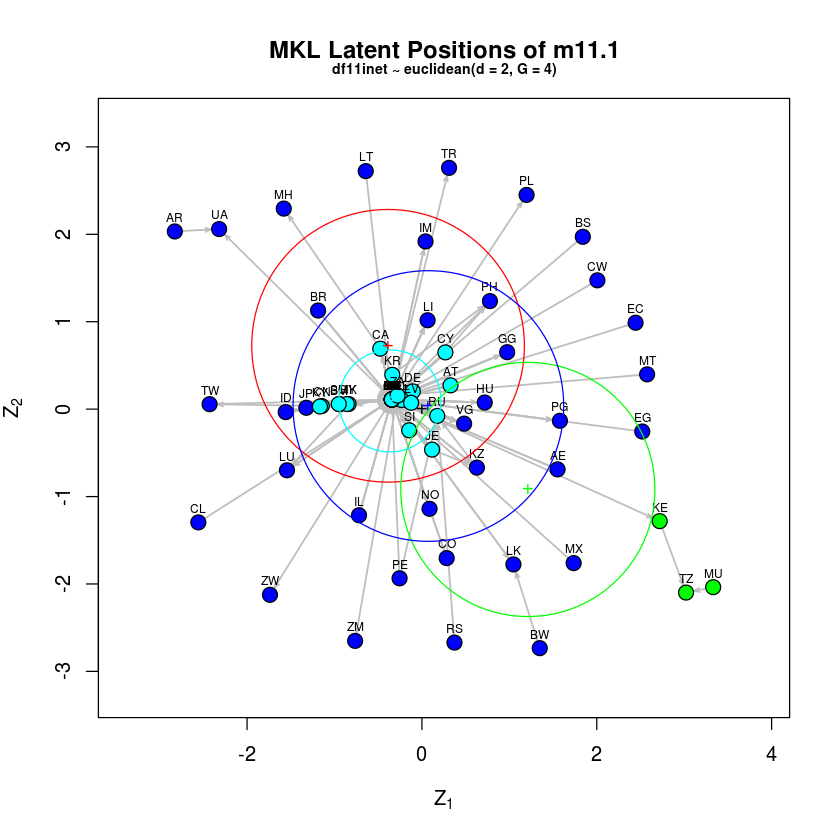

In [170]:
plot(m11.1, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

In [172]:
# 3 clusters
m11.2 <- ergmm(df11inet ~ euclidean(d=2,G=3), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))


Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


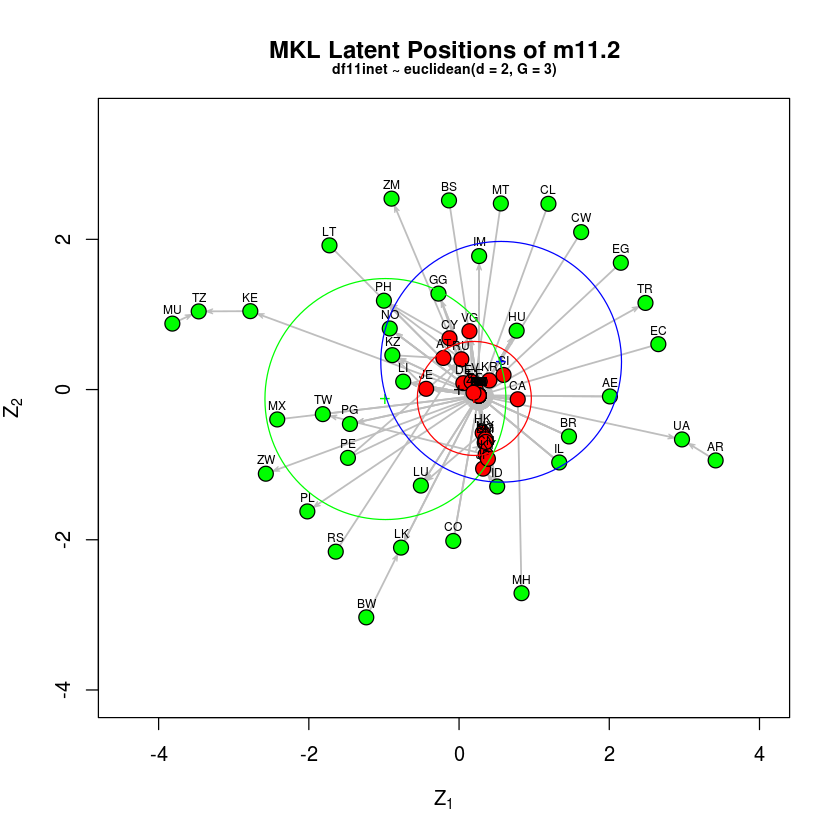

In [173]:
plot(m11.2, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

## 2012-2015

In [132]:
df15 <- read.csv('trans2015.csv', header = TRUE, row.names=1, sep = ",")
df15 <- as.matrix(df15)
df15 <- df15/rowSums(df15) 
# replace NaN with 0
df15[is.nan(df15)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df15net <- as.network(df15, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")

# no isolates
df15i <- read.csv('trans2015_noisolates.csv', header = TRUE, row.names=1, sep = ",")
df15i <- as.matrix(df15i)
df15i <- df15i/rowSums(df15i) 
# replace NaN with 0
df15i[is.nan(df15i)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df15inet <- as.network(df15i, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")


In [174]:
# 4 clusters
m15.1 <- ergmm(df15inet ~ euclidean(d=2,G=4), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))


Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


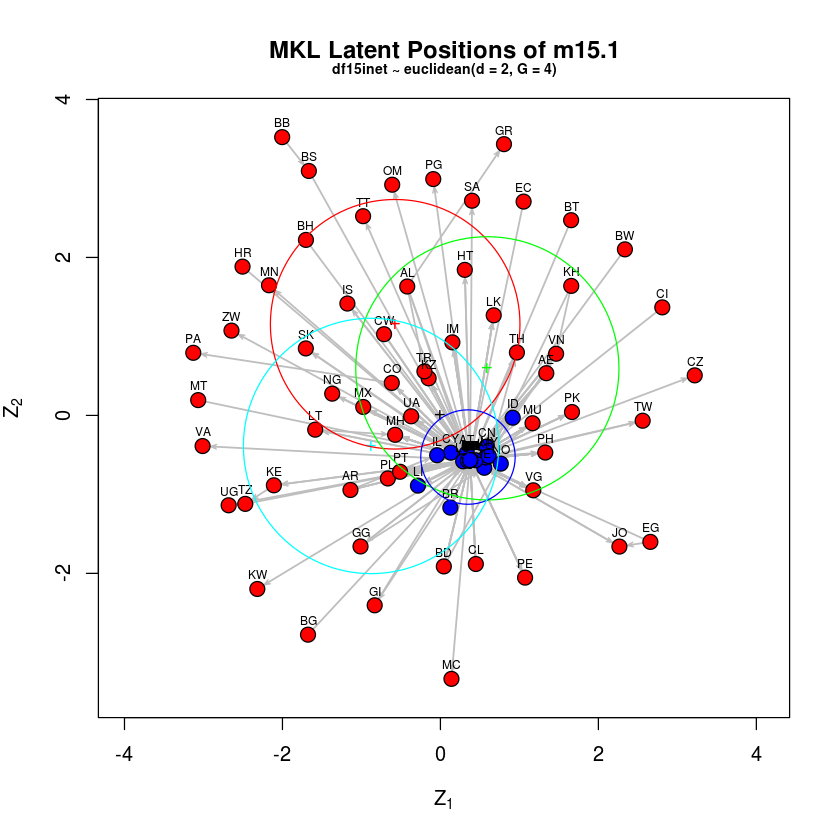

In [175]:
plot(m15.1, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

In [176]:
# 3 clusters
m15.2 <- ergmm(df15inet ~ euclidean(d=2,G=3), verbose=TRUE, seed = 6, control = control.ergmm(burnin = 10000, sample.size = 10000))


Generating initial values for MCMC:
Computing geodesic distances... Finished.
Computing MDS locations... Finished.
Computing other initial values... Finished.
Finding the conditional posterior mode... Finished.
Burning in... Finished.
Starting sampling run... Finished.
Post-processing the MCMC output:
Performing label-switching... Finished.
Fitting the MKL locations... Finished.
Fitting MBC conditional on MKL locations... Finished.
Performing Procrustes transformation... Finished.


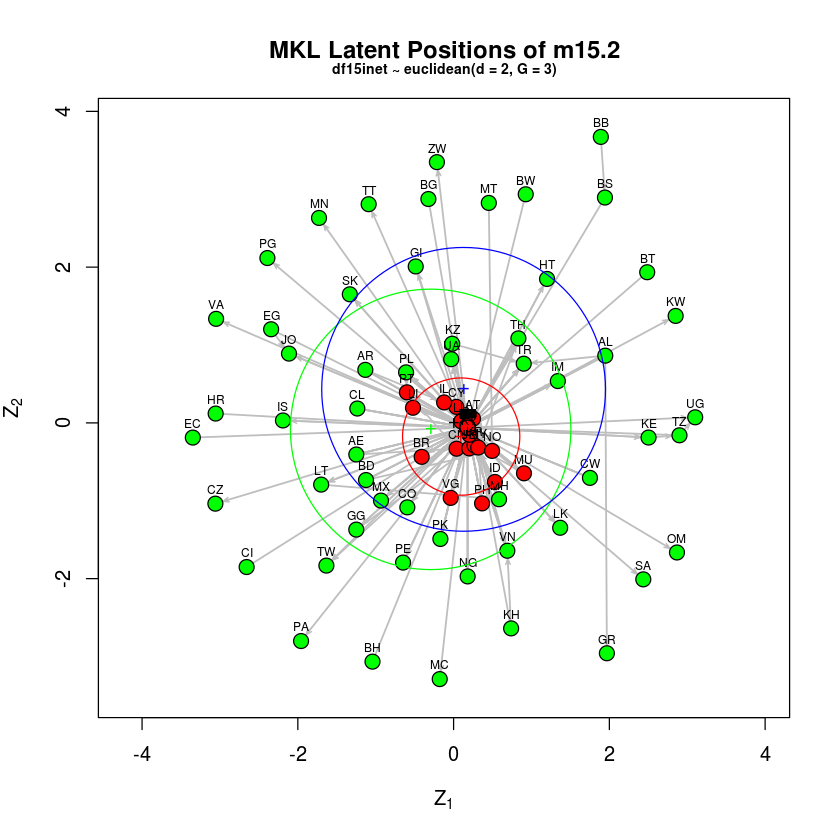

In [177]:
plot(m15.2, pie=FALSE, labels=TRUE, print.formula=TRUE, vertex.cex=1.3,
     arrowhead.cex = 0.6, label.pos=3,label.cex=0.6)

## Network descriptive stats

In [116]:
# take the largest connected components

# 2000-2003
df03g <- read.csv('trans2003_giant.csv', header = TRUE, row.names=1, sep = ",")
df03g <- as.matrix(df03g)
df03g <- df03g/rowSums(df03g) 
# replace NaN with 0
df03g[is.nan(df03g)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df03gnet <- as.network(df03g, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")
wnet03g=as.sociomatrix(df03gnet,"weight") 

# 2003-2006
df06g <- read.csv('trans2006_giant.csv', header = TRUE, row.names=1, sep = ",")
df06g <- as.matrix(df06g)
df06g <- df06g/rowSums(df06g) 
# replace NaN with 0
df06g[is.nan(df06g)] <- 0
# Create a network where the number of nominations becomes an attribute of an edge.
df06gnet <- as.network(df06g, directed=TRUE, matrix.type="adjacency",
                        ignore.eval=FALSE, names.eval="weight")
wnet06g=as.sociomatrix(df06gnet,"weight") 



In [153]:
# Density
networks <- list(df03gnet,df06gnet, df11inet, df15inet)
lapply(networks, gden)

[[1]]
[1] 0.08250356

[[2]]
[1] 0.07003367

[[3]]
[1] 0.06161972

[[4]]
[1] 0.06010101

In [154]:
# Dyadic reciprocity
lapply(networks, grecip)

[[1]]
      Mut 
0.8349929 

[[2]]
      Mut 
0.8612795 

[[3]]
      Mut 
0.8798905 

[[4]]
      Mut 
0.8878788

In [155]:
# Edgewise reciprocity
lapply(networks, grecip, measure="edgewise")

[[1]]
Mut 
  0 

[[2]]
        Mut 
0.009615385 

[[3]]
       Mut 
0.02539683 

[[4]]
       Mut 
0.06722689

In [156]:
 # Transitivity
lapply(networks, gtrans)

[[1]]
[1] 0.4492099

[[2]]
[1] 0.5095785

[[3]]
[1] 0.4181261

[[4]]
[1] 0.4320203